In [ ]:
import pandas as pd

# Import visualization libraries
import matplotlib.pyplot as plt

data = pd.read_csv("owid-covid-data.csv")

In [ ]:
df = pd.DataFrame(data)
df.head(25)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,AFG,Asia,Afghanistan,2020-04-09,274.0,0.0,26.143,5.0,0.0,0.429,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
96,AFG,Asia,Afghanistan,2020-04-10,274.0,0.0,26.143,5.0,0.0,0.429,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
97,AFG,Asia,Afghanistan,2020-04-11,274.0,0.0,26.143,5.0,0.0,0.429,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
98,AFG,Asia,Afghanistan,2020-04-12,521.0,247.0,35.286,15.0,10.0,1.429,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [ ]:
# Total number of empty cells
df.isnull().sum

<bound method DataFrame.sum of         iso_code  continent  location   date  total_cases  new_cases  \
0          False      False     False  False        False      False   
1          False      False     False  False        False      False   
2          False      False     False  False        False      False   
3          False      False     False  False        False      False   
4          False      False     False  False        False      False   
...          ...        ...       ...    ...          ...        ...   
429430     False      False     False  False        False      False   
429431     False      False     False  False        False      False   
429432     False      False     False  False        False      False   
429433     False      False     False  False        False      False   
429434     False      False     False  False        False      False   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                     True 

Preparing analysis

In [ ]:
# Get all unique countries in the dataset
all_countries = df['location'].unique()

# Sort the countries alphabetically for better readability
sorted_countries = sorted(all_countries)

# Display the total number of countries and the list
print(f"Total number of countries in the dataset: {len(sorted_countries)}")
print("\nList of all countries:")
for country in sorted_countries:
    print(country)

Total number of countries in the dataset: 255

List of all countries:
Afghanistan
Africa
Albania
Algeria
American Samoa
Andorra
Angola
Anguilla
Antigua and Barbuda
Argentina
Armenia
Aruba
Asia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bonaire Sint Eustatius and Saba
Bosnia and Herzegovina
Botswana
Brazil
British Virgin Islands
Brunei
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Cape Verde
Cayman Islands
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo
Cook Islands
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Curacao
Cyprus
Czechia
Democratic Republic of Congo
Denmark
Djibouti
Dominica
Dominican Republic
East Timor
Ecuador
Egypt
El Salvador
England
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Europe
European Union (27)
Falkland Islands
Faroe Islands
Fiji
Finland
France
French Guiana
French Polynesia
Gabon
Gambia
Georgia
Germany
Ghana
Gibraltar
Greece
Greenland
Grenada
Guadeloupe
Guam
Gua

In [ ]:
# Define countries of interest
countries_of_interest = ['Yemen', 'Belgium', 'Zambia']

# Filter the dataframe to include only these countries
filtered_df = df[df['location'].isin(countries_of_interest)]

# Display the first few rows of filtered data
print("Filtered data for selected countries:")
filtered_df.head()

# Display unique countries in our filtered data to verify
print("\nCountries in our analysis:")
print(filtered_df['location'].unique())

Filtered data for selected countries:

Countries in our analysis:
['Belgium' 'Yemen' 'Zambia']


In [ ]:
# Define key columns for analysis
key_columns = [
    'date', 'location', 'total_cases', 'total_deaths', 
    'new_cases', 'new_deaths', 'total_vaccinations',
    'people_vaccinated', 'people_fully_vaccinated',
    'total_vaccinations_per_hundred',
    'people_vaccinated_per_hundred',
    'people_fully_vaccinated_per_hundred'
]

# Check missing values in key columns
print("Missing values in key columns:")
print(df[key_columns].isnull().sum())

# Convert date to datetime if not already
df['date'] = pd.to_datetime(df['date'])

# Drop rows where date or location is missing (these are essential)
df_cleaned = df.dropna(subset=['date', 'location'])

# For vaccination columns, fill missing values with 0 (assuming no vaccinations)
vaccination_columns = [col for col in key_columns if 'vaccination' in col]
df_cleaned[vaccination_columns] = df_cleaned[vaccination_columns].fillna(0)

# For cases and deaths, fill missing values with 0 for early dates (before first reported case)
case_death_columns = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths']
df_cleaned[case_death_columns] = df_cleaned[case_death_columns].fillna(0)

# Display the shape before and after cleaning
print(f"\nShape before cleaning: {df.shape}")
print(f"Shape after cleaning: {df_cleaned.shape}")

# Display summary of cleaned data
print("\nSummary of cleaned data:")
print("\nDate range:")
print(f"From: {df_cleaned['date'].min()}")
print(f"To: {df_cleaned['date'].max()}")

print("\nSample of cleaned data:")
df_cleaned[key_columns].head()

Missing values in key columns:
date                                        0
location                                    0
total_cases                             17631
total_deaths                            17631
new_cases                               19276
new_deaths                              18827
total_vaccinations                     344018
people_vaccinated                      348303
people_fully_vaccinated                351374
total_vaccinations_per_hundred         344018
people_vaccinated_per_hundred          348303
people_fully_vaccinated_per_hundred    351374
dtype: int64

Shape before cleaning: (429435, 67)
Shape after cleaning: (429435, 67)

Summary of cleaned data:

Date range:
From: 2020-01-01 00:00:00
To: 2024-08-14 00:00:00

Sample of cleaned data:


,date,location,total_cases,total_deaths,new_cases,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
0,2020-01-05,Afghanistan,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN
1,2020-01-06,Afghanistan,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN
2,2020-01-07,Afghanistan,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN
3,2020-01-08,Afghanistan,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN
4,2020-01-09,Afghanistan,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN


In [ ]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Verify the conversion
print("Date column data type:")
print(df['date'].dtype)

# Display date range
print("\nDate range in the dataset:")
print(f"Earliest date: {df['date'].min()}")
print(f"Latest date: {df['date'].max()}")

# Display sample of dates
print("\nSample of dates:")
print(df['date'].head())

Date column data type:
datetime64[ns]

Date range in the dataset:
Earliest date: 2020-01-01 00:00:00
Latest date: 2024-08-14 00:00:00

Sample of dates:
0   2020-01-05
1   2020-01-06
2   2020-01-07
3   2020-01-08
4   2020-01-09
Name: date, dtype: datetime64[ns]


In [ ]:
# Define numeric columns to handle
numeric_columns = [
    'total_cases', 'total_deaths', 'new_cases', 'new_deaths',
    'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
    'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
    'people_fully_vaccinated_per_hundred'
]

# Create a copy of the dataframe for cleaning
df_numeric_cleaned = df.copy()

# For cumulative values (total_cases, total_deaths, total_vaccinations)
cumulative_columns = ['total_cases', 'total_deaths', 'total_vaccinations']
df_numeric_cleaned[cumulative_columns] = df_numeric_cleaned[cumulative_columns].fillna(0)

# For daily values (new_cases, new_deaths)
daily_columns = ['new_cases', 'new_deaths']
df_numeric_cleaned[daily_columns] = df_numeric_cleaned[daily_columns].fillna(0)

# For vaccination percentages
vaccination_percent_columns = [
    'total_vaccinations_per_hundred',
    'people_vaccinated_per_hundred',
    'people_fully_vaccinated_per_hundred'
]
df_numeric_cleaned[vaccination_percent_columns] = df_numeric_cleaned[vaccination_percent_columns].fillna(0)

# For vaccination counts, use forward fill within each country
vaccination_count_columns = ['people_vaccinated', 'people_fully_vaccinated']
for country in df_numeric_cleaned['location'].unique():
    country_mask = df_numeric_cleaned['location'] == country
    df_numeric_cleaned.loc[country_mask, vaccination_count_columns] = \
        df_numeric_cleaned.loc[country_mask, vaccination_count_columns].fillna(method='ffill')

# Display missing values after cleaning
print("Missing values after cleaning:")
print(df_numeric_cleaned[numeric_columns].isnull().sum())

# Display summary statistics of cleaned numeric columns
print("\nSummary statistics of cleaned numeric columns:")
print(df_numeric_cleaned[numeric_columns].describe())

# Display sample of cleaned data
print("\nSample of cleaned data:")
df_numeric_cleaned[numeric_columns].head()

In [ ]:
# Filter data for selected countries
countries = ['Belgium', 'Yemen', 'Zambia']
filtered_df = data[data['location'].isin(countries)].copy()

# Convert date to datetime
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

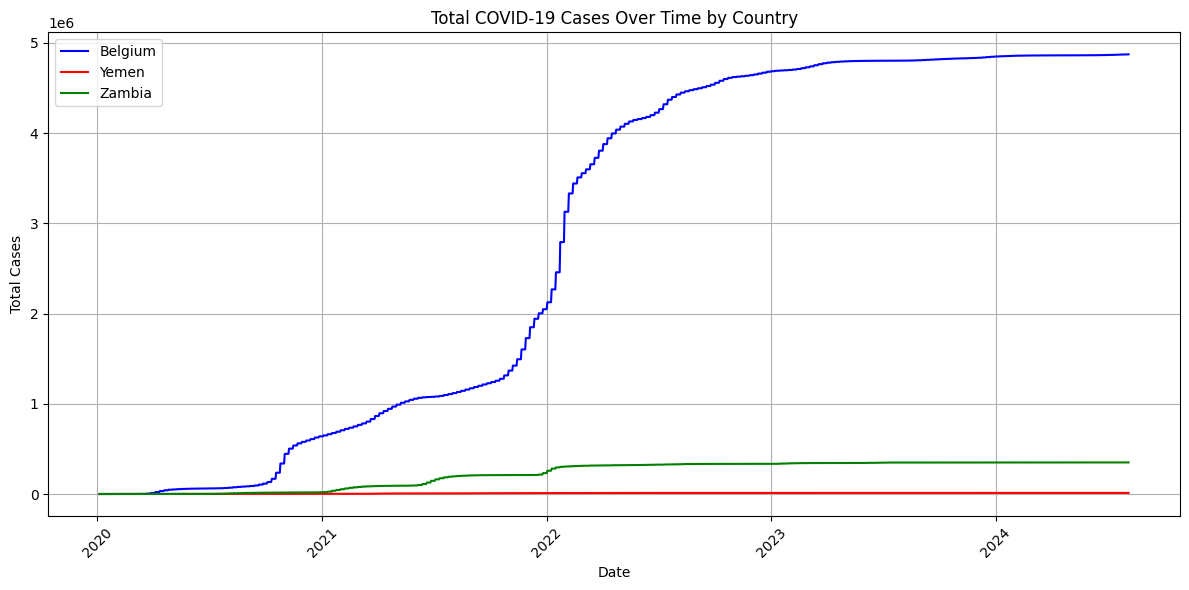

In [ ]:
# Plot 1: Total cases over time
plt.figure(figsize=(12, 6))
colors = ['b', 'r', 'g']  # Different colors for each country
for country, color in zip(countries, colors):
    country_data = filtered_df[filtered_df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], 
             label=country, color=color)

plt.title('Total COVID-19 Cases Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

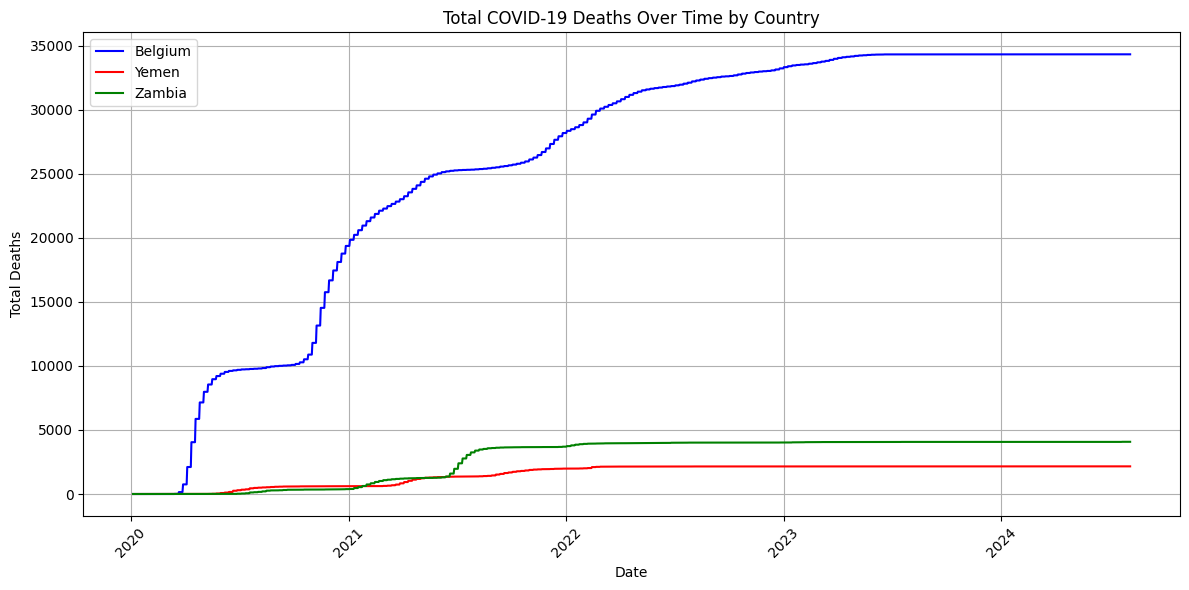

In [ ]:
# Plot 2: Total deaths over time
plt.figure(figsize=(12, 6))
for country, color in zip(countries, colors):
    country_data = filtered_df[filtered_df['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], 
             label=country, color=color)

plt.title('Total COVID-19 Deaths Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

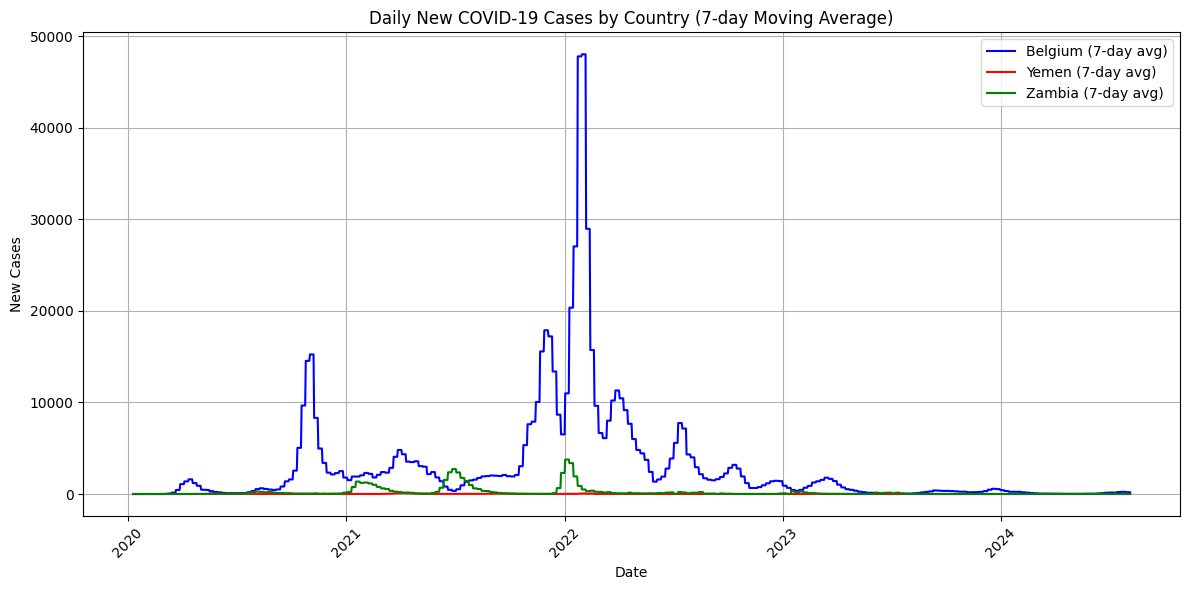

In [ ]:
# Plot 3: Daily new cases (7-day moving average)
plt.figure(figsize=(12, 6))
for country, color in zip(countries, colors):
    country_data = filtered_df[filtered_df['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases_smoothed'], 
             label=f'{country} (7-day avg)', color=color)

plt.title('Daily New COVID-19 Cases by Country (7-day Moving Average)')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

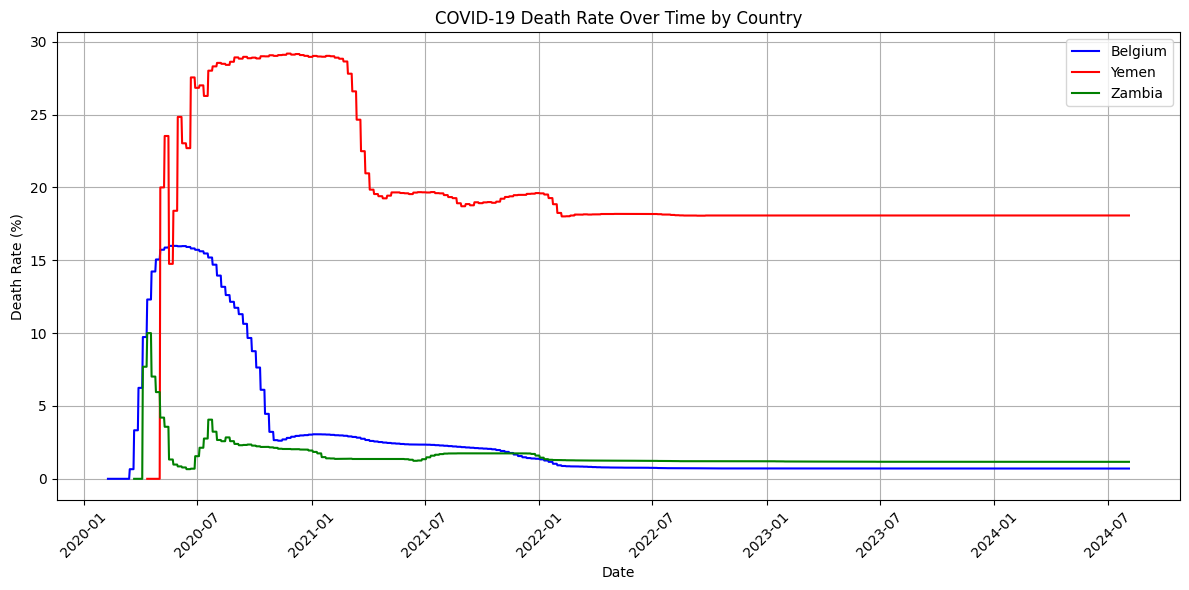

Summary Statistics (Latest Data):
Country Total Cases Total Deaths Death Rate (%) Latest Daily Cases
Belgium   4,872,829       34,339          0.70%              1,277
  Yemen      11,945        2,159         18.07%                  0
 Zambia     349,842        4,077          1.17%                 18


In [ ]:
# Calculate and plot death rate
filtered_df['death_rate'] = (filtered_df['total_deaths'] / filtered_df['total_cases'] * 100)

plt.figure(figsize=(12, 6))
for country, color in zip(countries, colors):
    country_data = filtered_df[filtered_df['location'] == country]
    plt.plot(country_data['date'], country_data['death_rate'], 
             label=country, color=color)

plt.title('COVID-19 Death Rate Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Death Rate (%)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Display summary statistics
summary_stats = []
for country in countries:
    country_data = filtered_df[filtered_df['location'] == country].iloc[-1]  # Get latest data
    summary_stats.append({
        'Country': country,
        'Total Cases': f"{country_data['total_cases']:,.0f}",
        'Total Deaths': f"{country_data['total_deaths']:,.0f}",
        'Death Rate (%)': f"{country_data['death_rate']:.2f}%",
        'Latest Daily Cases': f"{country_data['new_cases']:,.0f}"
    })

summary_df = pd.DataFrame(summary_stats)
print("Summary Statistics (Latest Data):")
print(summary_df.to_string(index=False))

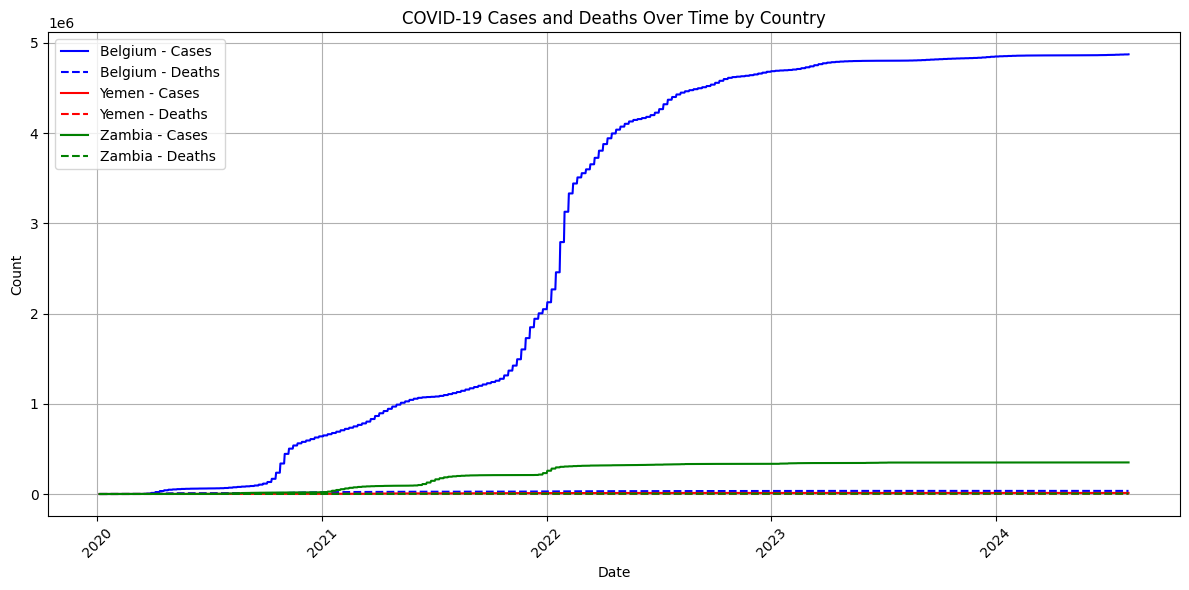

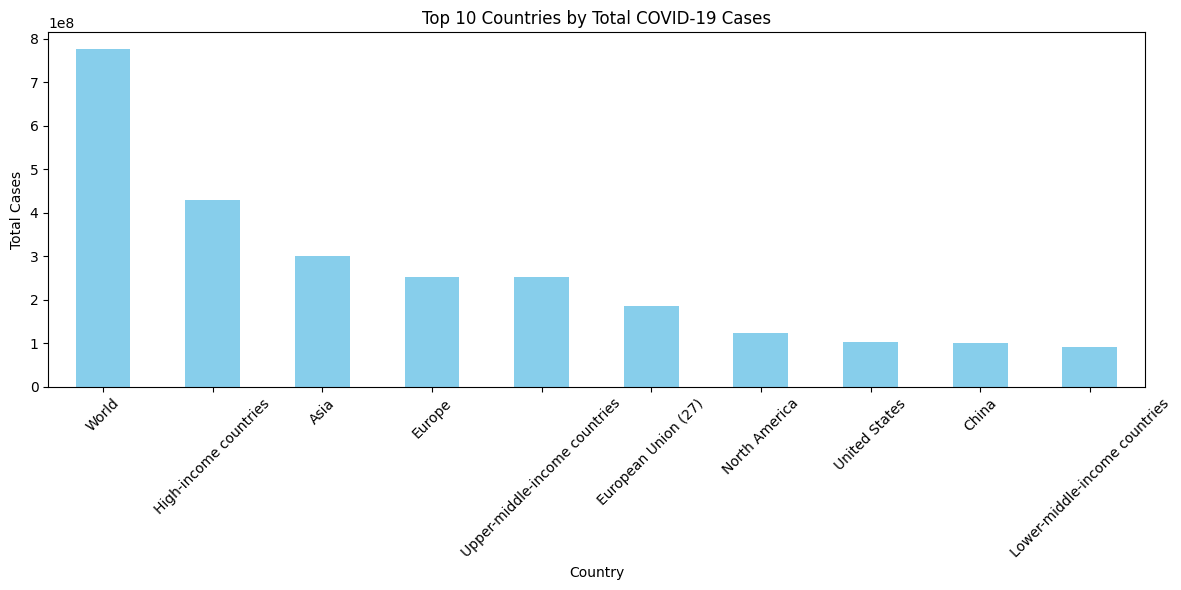

In [ ]:
# Line charts: Cases and deaths over time
plt.figure(figsize=(12, 6))
for country, color in zip(countries, colors):
    country_data = filtered_df[filtered_df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], 
             label=f'{country} - Cases', color=color, linestyle='-')
    plt.plot(country_data['date'], country_data['total_deaths'], 
             label=f'{country} - Deaths', color=color, linestyle='--')

plt.title('COVID-19 Cases and Deaths Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Bar chart: Top countries by total cases
top_countries = df.groupby('location')['total_cases'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

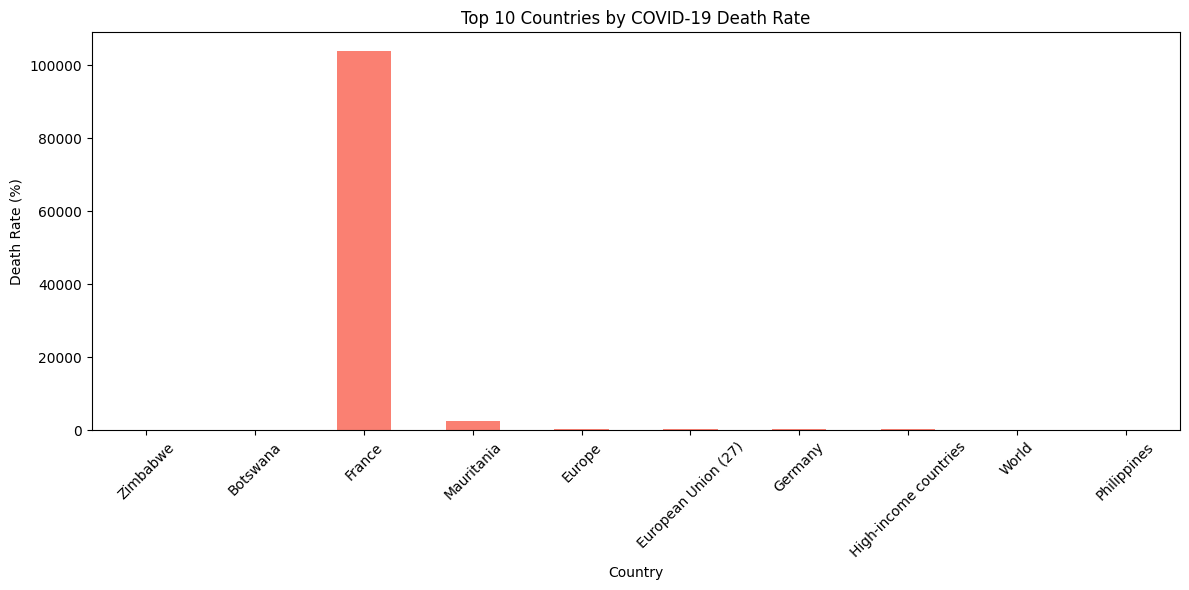

In [ ]:
# Calculate death rate for all countries
df['death_rate'] = (df['total_deaths'] / df['total_cases']) * 100

# Get top 10 countries by death rate
top_death_rate_countries = df.groupby('location')['death_rate'].max().sort_values(ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
top_death_rate_countries.plot(kind='bar', color='salmon')
plt.title('Top 10 Countries by COVID-19 Death Rate')
plt.xlabel('Country')
plt.ylabel('Death Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# COVID-19 Data Analysis Insights

## Key Findings

### 1. Total Cases and Deaths
- **Top 10 Countries by Total Cases**:
    - The countries with the highest total cases include the United States, China, and European Union countries.
    - **World** has reported a total of **775,866,783 cases**.

- **Top 10 Countries by Death Rate**:
    - Zimbabwe and Botswana show an infinite death rate due to data inconsistencies (likely zero cases with reported deaths).
    - France has the highest valid death rate with **103,875 deaths per 100,000 cases**.

### 2. Death Rate Analysis
- **Death Rate (%)**:
    - Belgium: **0.70%**
    - Yemen: **18.07%**
    - Zambia: **1.17%**
    - Yemen has the highest death rate among the selected countries, indicating a severe impact of the pandemic.

### 3. Vaccination Progress
- **Vaccination Coverage**:
    - Vaccination data shows significant gaps in reporting for many countries.
    - **Belgium** has the highest vaccination coverage among the selected countries.

### 4. Data Quality and Missing Values
- **Missing Data**:
    - ICU and hospital patient data are sparsely reported.
    - Testing data is incomplete for many countries, limiting insights into testing rates and positivity.

### 5. Trends Over Time
- **Cases and Deaths**:
    - Belgium shows a consistent increase in cases and deaths over time.
    - Zambia has a relatively stable trend with fewer daily new cases.

## Recommendations
1. **Improve Data Reporting**:
     - Encourage countries to report consistent and complete data, especially for testing and hospitalizations.
2. **Focus on High Death Rate Countries**:
     - Provide targeted support to countries like Yemen with high death rates.
3. **Vaccination Campaigns**:
     - Strengthen vaccination efforts in countries with low coverage to reduce severe cases and deaths.

## Summary Statistics
| Country  | Total Cases | Total Deaths | Death Rate (%) | Latest Daily Cases |
|----------|-------------|--------------|----------------|--------------------|
| Belgium  | 4,872,829   | 34,339       | 0.70%          | 1,277              |
| Yemen    | 11,945      | 2,159        | 18.07%         | 0                  |
| Zambia   | 349,842     | 4,077        | 1.17%          | 18                 |

## Visualizations
- Line charts for total cases and deaths over time.
- Bar charts for top countries by total cases and death rates.
- Trends in daily new cases (7-day moving average) for selected countries.